In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a757ff8cbbf22e98923d1228443563a9


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

648

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | beyneu
Processing Record 2 of Set 1 | fairbanks
Processing Record 3 of Set 1 | mayumba
Processing Record 4 of Set 1 | karratha
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | aswan
Processing Record 8 of Set 1 | mokrous
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | puerto baquerizo moreno
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | fengxian
Processing Record 17 of Set 1 | baykit
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | kuching
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | hilo
Processing Record 23 of Set 1 | puerto ayor

Processing Record 37 of Set 4 | pevek
Processing Record 38 of Set 4 | clyde river
Processing Record 39 of Set 4 | batangafo
Processing Record 40 of Set 4 | ostrovnoy
Processing Record 41 of Set 4 | marietta
Processing Record 42 of Set 4 | severo-kurilsk
Processing Record 43 of Set 4 | durban
Processing Record 44 of Set 4 | amderma
City not found. Skipping...
Processing Record 45 of Set 4 | lorengau
Processing Record 46 of Set 4 | warqla
City not found. Skipping...
Processing Record 47 of Set 4 | kharabali
Processing Record 48 of Set 4 | chokurdakh
Processing Record 49 of Set 4 | grand island
Processing Record 50 of Set 4 | huarmey
Processing Record 1 of Set 5 | almaznyy
Processing Record 2 of Set 5 | hithadhoo
Processing Record 3 of Set 5 | konya
Processing Record 4 of Set 5 | ginir
Processing Record 5 of Set 5 | toba
Processing Record 6 of Set 5 | lompoc
Processing Record 7 of Set 5 | nuuk
Processing Record 8 of Set 5 | rangoon
Processing Record 9 of Set 5 | saskylakh
Processing Recor

Processing Record 27 of Set 8 | zlobin
Processing Record 28 of Set 8 | talaya
Processing Record 29 of Set 8 | bacong
Processing Record 30 of Set 8 | novo aripuana
Processing Record 31 of Set 8 | varberg
Processing Record 32 of Set 8 | acapulco
Processing Record 33 of Set 8 | ati
Processing Record 34 of Set 8 | yar-sale
Processing Record 35 of Set 8 | kermen
Processing Record 36 of Set 8 | manaus
Processing Record 37 of Set 8 | san felipe
Processing Record 38 of Set 8 | bom jardim
Processing Record 39 of Set 8 | tual
Processing Record 40 of Set 8 | college
Processing Record 41 of Set 8 | saldanha
Processing Record 42 of Set 8 | coihaique
Processing Record 43 of Set 8 | hutchinson
Processing Record 44 of Set 8 | nanortalik
Processing Record 45 of Set 8 | ampanihy
Processing Record 46 of Set 8 | siparia
Processing Record 47 of Set 8 | killarney
Processing Record 48 of Set 8 | rio grande
Processing Record 49 of Set 8 | cabo san lucas
Processing Record 50 of Set 8 | tobol
Processing Record 

Processing Record 19 of Set 12 | saint-pierre
Processing Record 20 of Set 12 | tevaitoa
Processing Record 21 of Set 12 | bara
Processing Record 22 of Set 12 | luderitz
Processing Record 23 of Set 12 | rocha
Processing Record 24 of Set 12 | la peca
Processing Record 25 of Set 12 | almeirim
Processing Record 26 of Set 12 | alberton
Processing Record 27 of Set 12 | chuncheng
Processing Record 28 of Set 12 | sayyan
Processing Record 29 of Set 12 | ugoofaaru
Processing Record 30 of Set 12 | merauke
Processing Record 31 of Set 12 | niquero
Processing Record 32 of Set 12 | nishihara
Processing Record 33 of Set 12 | great yarmouth
Processing Record 34 of Set 12 | hellvik
Processing Record 35 of Set 12 | andra
Processing Record 36 of Set 12 | cibitoke
Processing Record 37 of Set 12 | viligili
City not found. Skipping...
Processing Record 38 of Set 12 | sabang
Processing Record 39 of Set 12 | salisbury
Processing Record 40 of Set 12 | japura
Processing Record 41 of Set 12 | gornopravdinsk
Proces

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Beyneu,45.32,55.20,73.98,53,100,4.56,KZ,2020-08-21 19:23:14
1,Fairbanks,64.84,-147.72,57.99,93,75,1.43,US,2020-08-21 19:23:14
2,Mayumba,-3.43,10.66,73.38,85,93,4.97,GA,2020-08-21 19:23:14
3,Karratha,-20.74,116.85,71.01,31,0,8.95,AU,2020-08-21 19:22:36
4,Bluff,-46.60,168.33,46.99,97,54,3.00,NZ,2020-08-21 19:23:14
5,Tiksi,71.69,128.87,37.85,85,100,9.53,RU,2020-08-21 19:23:14
6,Aswan,24.09,32.91,91.74,16,0,11.23,EG,2020-08-21 19:23:14
7,Mokrous,51.23,47.52,57.56,75,0,8.41,RU,2020-08-21 19:23:15
8,Port Alfred,-33.59,26.89,58.80,72,0,11.50,ZA,2020-08-21 19:23:15
9,Punta Arenas,-53.15,-70.92,48.20,66,75,16.11,CL,2020-08-21 19:20:51


In [10]:
city_data

[{'City': 'Beyneu',
  'Lat': 45.32,
  'Lng': 55.2,
  'Max Temp': 73.98,
  'Humidity': 53,
  'Cloudiness': 100,
  'Wind Speed': 4.56,
  'Country': 'KZ',
  'Date': '2020-08-21 19:23:14'},
 {'City': 'Fairbanks',
  'Lat': 64.84,
  'Lng': -147.72,
  'Max Temp': 57.99,
  'Humidity': 93,
  'Cloudiness': 75,
  'Wind Speed': 1.43,
  'Country': 'US',
  'Date': '2020-08-21 19:23:14'},
 {'City': 'Mayumba',
  'Lat': -3.43,
  'Lng': 10.66,
  'Max Temp': 73.38,
  'Humidity': 85,
  'Cloudiness': 93,
  'Wind Speed': 4.97,
  'Country': 'GA',
  'Date': '2020-08-21 19:23:14'},
 {'City': 'Karratha',
  'Lat': -20.74,
  'Lng': 116.85,
  'Max Temp': 71.01,
  'Humidity': 31,
  'Cloudiness': 0,
  'Wind Speed': 8.95,
  'Country': 'AU',
  'Date': '2020-08-21 19:22:36'},
 {'City': 'Bluff',
  'Lat': -46.6,
  'Lng': 168.33,
  'Max Temp': 46.99,
  'Humidity': 97,
  'Cloudiness': 54,
  'Wind Speed': 3,
  'Country': 'NZ',
  'Date': '2020-08-21 19:23:14'},
 {'City': 'Tiksi',
  'Lat': 71.69,
  'Lng': 128.87,
  'Max Temp'

In [11]:
#Reorder columns for City_data_df
citydata_neworder = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[citydata_neworder]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Beyneu,KZ,2020-08-21 19:23:14,45.32,55.20,73.98,53,100,4.56
1,Fairbanks,US,2020-08-21 19:23:14,64.84,-147.72,57.99,93,75,1.43
2,Mayumba,GA,2020-08-21 19:23:14,-3.43,10.66,73.38,85,93,4.97
3,Karratha,AU,2020-08-21 19:22:36,-20.74,116.85,71.01,31,0,8.95
4,Bluff,NZ,2020-08-21 19:23:14,-46.60,168.33,46.99,97,54,3.00
5,Tiksi,RU,2020-08-21 19:23:14,71.69,128.87,37.85,85,100,9.53
6,Aswan,EG,2020-08-21 19:23:14,24.09,32.91,91.74,16,0,11.23
7,Mokrous,RU,2020-08-21 19:23:15,51.23,47.52,57.56,75,0,8.41
8,Port Alfred,ZA,2020-08-21 19:23:15,-33.59,26.89,58.80,72,0,11.50
9,Punta Arenas,CL,2020-08-21 19:20:51,-53.15,-70.92,48.20,66,75,16.11


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

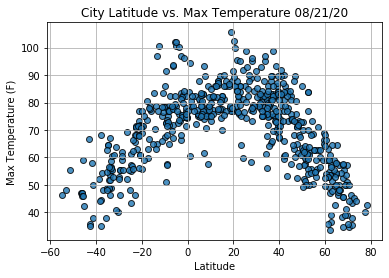

In [14]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

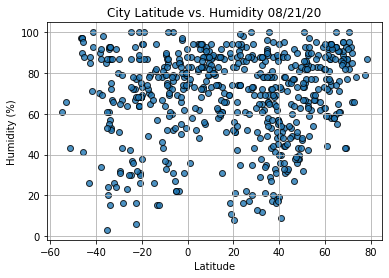

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

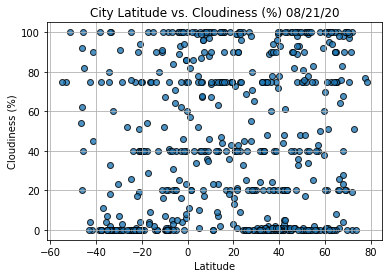

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

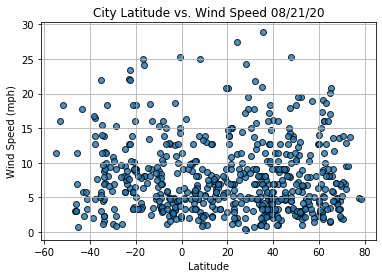

In [17]:
#Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City          Puerto Baquerizo Moreno
Country                            EC
Date              2020-08-21 19:23:15
Lat                              -0.9
Lng                             -89.6
Max Temp                         71.6
Humidity                           73
Cloudiness                         75
Wind Speed                      14.99
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
594    False
595     True
596     True
597     True
598     True
Name: Lat, Length: 599, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Beyneu,KZ,2020-08-21 19:23:14,45.32,55.20,73.98,53,100,4.56
1,Fairbanks,US,2020-08-21 19:23:14,64.84,-147.72,57.99,93,75,1.43
5,Tiksi,RU,2020-08-21 19:23:14,71.69,128.87,37.85,85,100,9.53
6,Aswan,EG,2020-08-21 19:23:14,24.09,32.91,91.74,16,0,11.23
7,Mokrous,RU,2020-08-21 19:23:15,51.23,47.52,57.56,75,0,8.41
...,...,...,...,...,...,...,...,...,...
593,Pandan,PH,2020-08-21 19:24:01,14.05,124.17,80.28,88,100,7.72
595,Torrington,US,2020-08-21 19:22:29,41.80,-73.12,87.01,48,44,1.01
596,Romitan,UZ,2020-08-21 19:24:02,39.93,64.38,69.80,40,0,6.93
597,Price,US,2020-08-21 19:24:02,39.60,-110.81,89.60,17,1,5.82


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

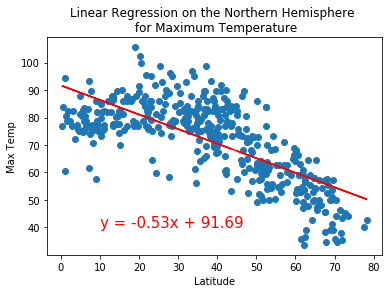

In [23]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, (10,40), fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')
    plt.title('Linear Regression on the Northern Hemisphere \n for Maximum Temperature')
    plt.show()

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

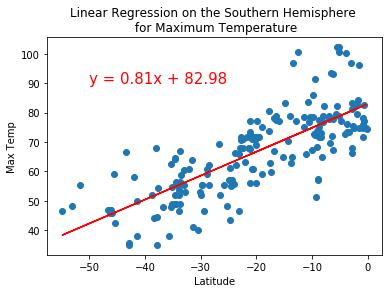

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, (-50,90), fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')
    plt.title('Linear Regression on the Southern Hemisphere \n for Maximum Temperature')
    plt.show()


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

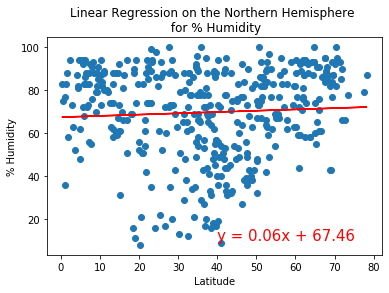

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, (40,10), fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel('% Humidity')
    plt.title('Linear Regression on the Northern Hemisphere \n for % Humidity')
    plt.show()
    
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

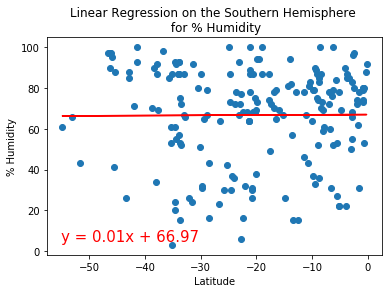

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, (-55,5), fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel('% Humidity')
    plt.title('Linear Regression on the Southern Hemisphere \n for % Humidity')
    plt.show()
    
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,5))

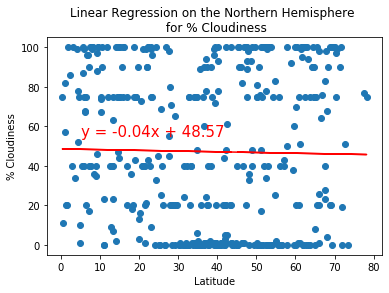

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, (5,55), fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel('% Cloudiness')
    plt.title('Linear Regression on the Northern Hemisphere \n for % Cloudiness')
    plt.show()
    
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(5,55))

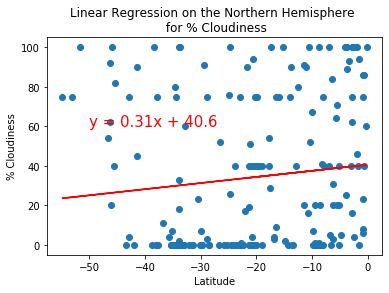

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, (-50,60), fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel('% Cloudiness')
    plt.title('Linear Regression on the Northern Hemisphere \n for % Cloudiness')
    plt.show()
    
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

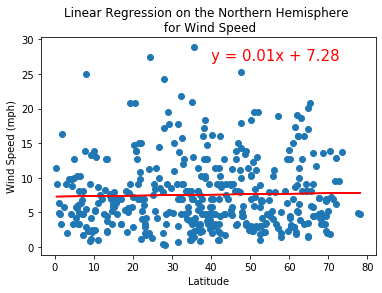

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, (40,27), fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel('Wind Speed (mph)')
    plt.title('Linear Regression on the Northern Hemisphere \n for Wind Speed')
    plt.show()
    
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,27))

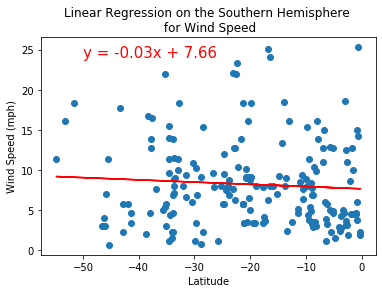

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, (-50,24), fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel('Wind Speed (mph)')
    plt.title('Linear Regression on the Southern Hemisphere \n for Wind Speed')
    plt.show()
    
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,24))